# Exploratory Data Analysis

Our goal is to predict if the customer will exit or not, that is churn or not churn. In this portion will will do some exploratory data analysis.

In [2]:
# import pandas as pd
# Load Data

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

customer = pd.read_csv("Telco_Customer_Churn.csv")

customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Size of data

Data has 7043 rows and 21 columns

In [45]:
# Check data shape

customer.shape

(7043, 21)

#### Target Column

In [32]:
customer["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [1]:
# Dummny Model Accuracy Rate (Baseline)

5174/(5174+1869)

0.7346301292063041

#### Missing Values and Datatypes

In [4]:
# Check for missing data

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have no missing values. 

The column `MonthlyCharges` is a float. `SeniorCitizen` and `tenure` are integers. The rest of the columns are objects.

The columns `CustomerID` does not help in determing if a customer churns or not and there will be deleted. 

Even though `Total Charges` is put in as a object it supposed to be a float. So that will be changed.

#### Check the objects columns

In [5]:
# Check the object columns

customer['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [18]:
customer["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [19]:
customer["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [20]:
customer["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [21]:
customer["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [22]:
customer["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [23]:
customer["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [46]:
customer["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [25]:
customer["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [26]:
customer["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [27]:
customer["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [28]:
customer["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [29]:
customer["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [30]:
customer["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [31]:
customer["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

#### Percent of customer churned

We need to establish how many customers churned. From the calculation below see that about 27% of the customers churned.

In [32]:
customer["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [33]:
# Using the value counts figures above

1869/(5174+1869)

0.2653698707936959

#### Change to float to plot graph

The column `TotalCharges` needs to be changed to float to create a visualization for it.
We need to fix an anomaly to in order to change it.

In [3]:
customer.iloc[488].TotalCharges

' '

In [5]:
# Replace the empty space with the monthly charge value
customer["TotalCharges"]=customer["TotalCharges"].replace(' ',"52.55")

In [6]:
customer.loc[(488)]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                            52.55
Churn                                      No
Name: 488, dtype: object

In [7]:
customer.iloc[488].TotalCharges

'52.55'

In [8]:
customer["TotalCharges"]=pd.to_numeric(customer["TotalCharges"])

In [9]:
customer.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now we see that the column `TotalCharges` is now float and not object.

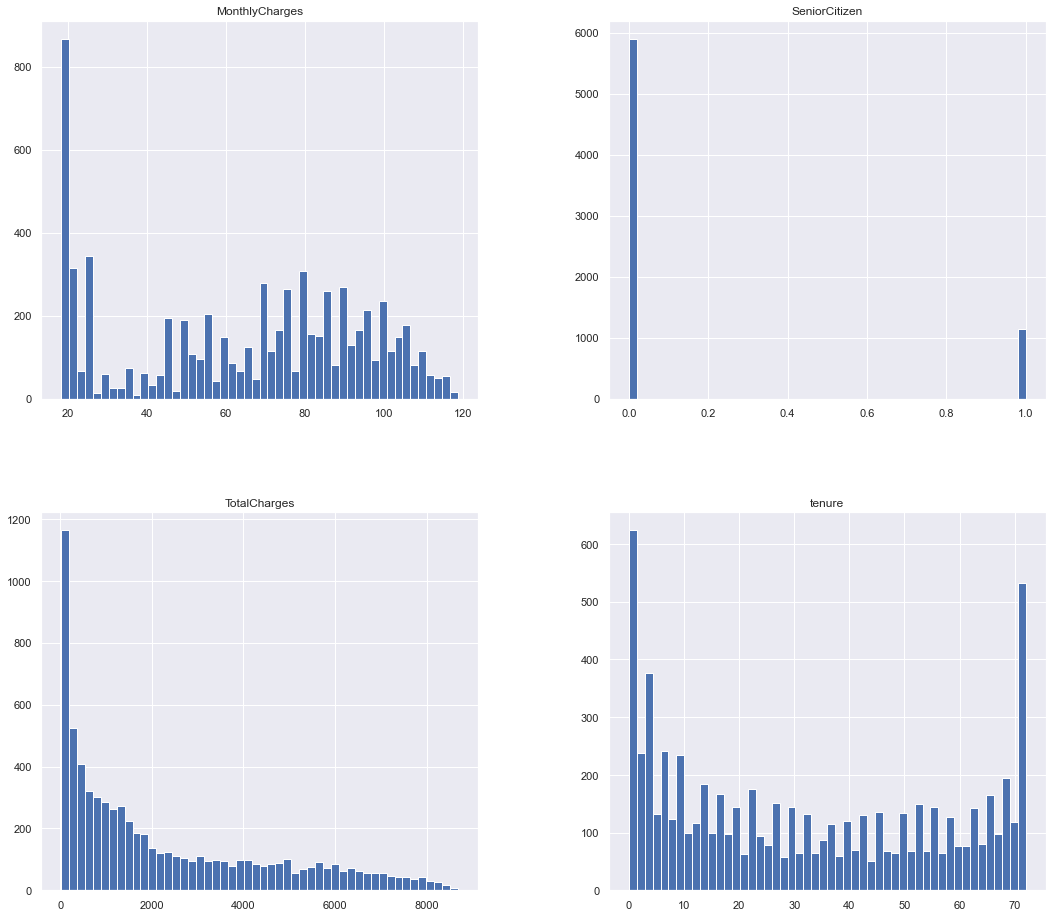

In [10]:
## Visualise the data

customer=customer.drop(columns="customerID")

customer.hist(bins=50, figsize=(18,16))
plt.show()

_notes_

MonthlyCharges - There are many people with a monthlh charge of less than 20.

SeniorCitizen - We see there are afew senior citizen.

TotalCharges - Many of the customer pay charges less than 1000. 

Tenure - The are many new customers, as there is a spike at the 0 to 2 value. The tenure is capped at 72 since it also spikes at 72,

The histograms are using different scales. 

In [11]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.816378
std,0.368612,24.559481,30.090047,2266.712864
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The values shown on table much with those on the graphs abov.

Tenure - the minimum is zero and the maximum is 72.

MonthlyCharges - The monthly charges have a minimum of 18.25. The mean is about 65 and the median is 70.

TotalCharges - The minimum Total Charge is 18.80, however the maximum is goes up to 8684.

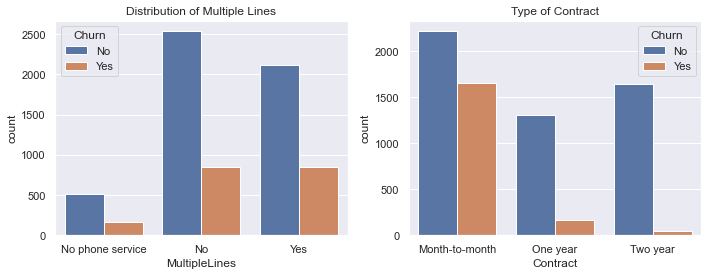

In [22]:
# Visualization

fig, axs = plt.subplots(1,2, figsize=(10,4))
seaborn.countplot(x="MultipleLines", hue="Churn", data=customer, ax=axs[0])
axs[0].set_title("Distribution of Multiple Lines")

seaborn.countplot(x="Contract", hue="Churn", data=customer, ax=axs[1])

plt.title("Type of Contract")

fig.tight_layout()

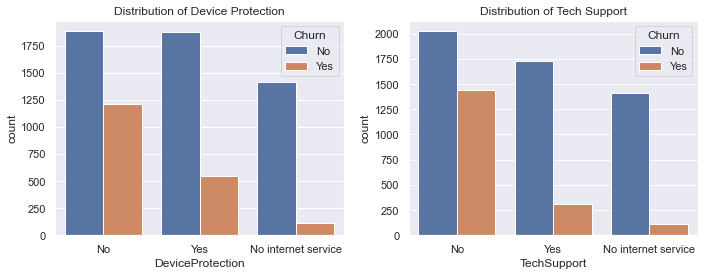

In [20]:
# More visualization
fig, axs = plt.subplots(1,2, figsize=(10,4))
seaborn.countplot(x="DeviceProtection", hue="Churn", data=customer, ax=axs[0])
axs[0].set_title("Distribution of Device Protection")

seaborn.countplot(x="TechSupport", hue="Churn", data=customer, ax=axs[1])
plt.title("Distribution of Tech Support")

fig.tight_layout()

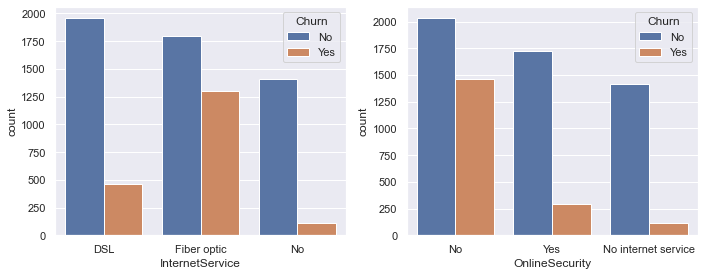

In [40]:
# More visualization
fig, axs = plt.subplots(1,2, figsize=(10,4))
seaborn.countplot(x="InternetService", hue="Churn", data=customer, ax=axs[0])
axs[0].set_title("Distribution of Internet Service")

seaborn.countplot(x="OnlineSecurity", hue="Churn", data=customer, ax=axs[1])
plt.title("Distribution of Online Security")

fig.tight_layout()

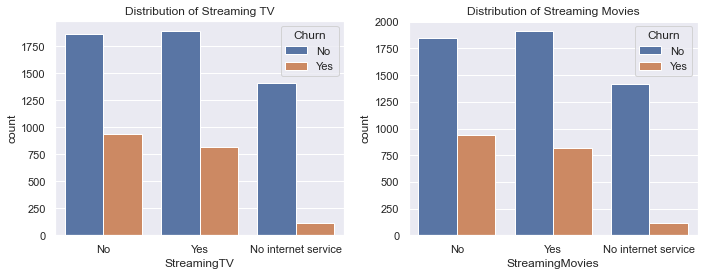

In [21]:
# More visualization
fig, axs = plt.subplots(1,2, figsize=(10,4))
seaborn.countplot(x="StreamingTV", hue="Churn", data=customer, ax=axs[0])
axs[0].set_title("Distribution of Streaming TV")

seaborn.countplot(x="StreamingMovies", hue="Churn", data=customer, ax=axs[1])
plt.title("Distribution of Streaming Movies")

fig.tight_layout()


#### Notes

From the graphs above:

MultipleLines - The graph shows that was of those that had phone service, almost the same number of customer churned, irrespective of whether they has multiple lines or not. 

Contract - more customers with month-to-month contract churned more than those with one or two year contract. Two year had the least churn maybe because the customers were tied by the contract. 

Device Protect and TechSupport - However, having Device protection and Tech Support played an important role in whether a customer churned or not. There was a high number of customers without device protection who churned compared to those that had device protection. Similarly, way more customers without Tech Support churned compared to those that had Tech Support.

Internet Service - Many customers using Fiber Optic internet churned. 

OnlineSecurity - Many customers without Online Security churned or exited. 

StreamingTV and StreamingMovies - Of the customers who had subscribed for internet service those who did not stream TV or movies churned more than those who stream TV or movies. 


Text(0.5, 1.0, 'Distribution of Dependents')

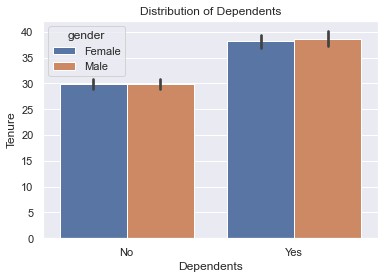

In [26]:
# Visualisation
seaborn.barplot(x="Dependents",y="tenure", hue="gender", data=customer)
plt.ylabel('Tenure')
plt.title('Distribution of Dependents')

Text(0.5, 1.0, 'Senior Citizen and Monthly Charges')

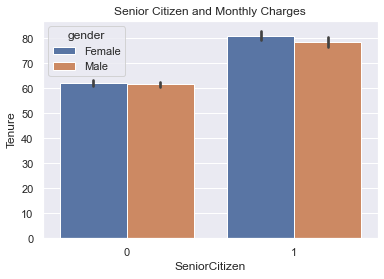

In [32]:
# Visualisation
seaborn.barplot(x="SeniorCitizen",y="MonthlyCharges", hue="gender", data=customer)
plt.ylabel('Tenure')
plt.title('Senior Citizen and Monthly Charges')

Senior Citizens paid more monthly services. 

Text(0.5, 1.0, 'Senior Citizens vs Non-Senior Citizens')

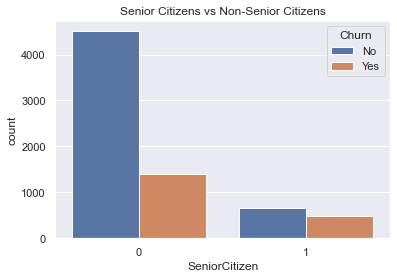

In [31]:
seaborn.countplot(x="SeniorCitizen", hue="Churn", data=customer)
plt.title('Senior Citizens vs Non-Senior Citizens')

Majority of the customers are not senior citizens.

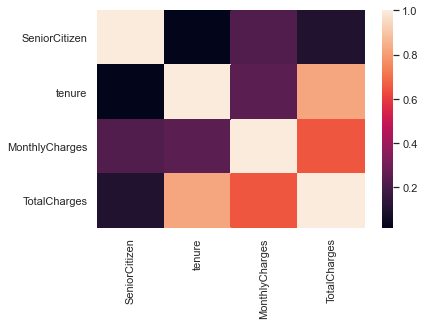

In [30]:
seaborn.heatmap(customer.corr())

SeniorCitizen        AxesSubplot(0.125,0.125;0.168478x0.755)
tenure            AxesSubplot(0.327174,0.125;0.168478x0.755)
MonthlyCharges    AxesSubplot(0.529348,0.125;0.168478x0.755)
TotalCharges      AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

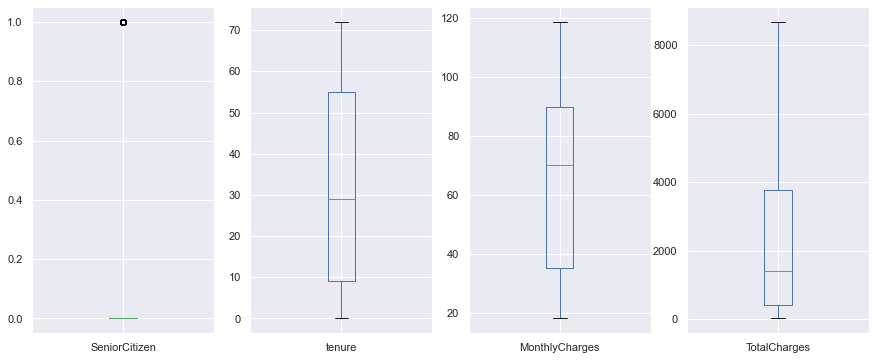

In [27]:
customer.plot(kind="box", figsize=(12,6), subplots=True)